In [8]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics.pairwise import linear_kernel
import warnings



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/IMDB.csv") # this is the original dataset

In [ ]:
dataset.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [8]:
dataset_lem=pd.read_csv("/content/drive/MyDrive/dataset_lem.csv") # this is the clean lemmetazeid version

In [ ]:
# we join the reviews together so that we can generate the wordcloud
text = " ".join(review for review in dataset['review'])

In [9]:
#we convert the STOPWORDS to a set because looking up an element in a set is more efficient 
stopwords = set(STOPWORDS)


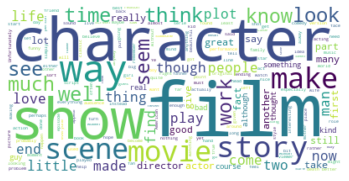

In [ ]:

# we geenrate the world cloud and realize that our dataset is noisy with stopwords and the <br> html tag , so we add them to the stop word set to make it more coherent
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stopwords.update(["br","even","one"]) #this is to add the other common stopwords

In [ ]:
#we create a new column
dataset['phrase_len'] = dataset['review'].apply(lambda row:len(row)) 
#we replace the strings with 0 and 1
dataset["sentiment"].replace({"positive": 1, "negative": 0}, inplace=True)
#and we calculate the mean for each category by using group by
dataset.groupby("sentiment").mean()

phrase_len
sentiment            
0          1294.06436
1          1324.79768

In [ ]:
dataset

review  sentiment  phrase_len
0      reviewer mentioned watching oz episode hooked ...          1        1020
1      wonderful little production filming technique ...          1         600
2      thought wonderful way spend time hot summer we...          1         531
3      basically family little boy jake think zombie ...          0         403
4      petter mattei love time money visually stunnin...          1         783
...                                                  ...        ...         ...
49995  thought movie right good job creative original...          1         480
49996  bad plot bad dialogue bad acting idiotic direc...          0         354
49997  catholic taught parochial elementary school nu...          0         772
49998  going disagree previous comment side maltin se...          0         776
49999  expects star trek movie high art fan expect mo...          0         378

[50000 rows x 3 columns]

In [ ]:
dataset=dataset[dataset['phrase_len']>3] # we notice that nothing changes concerning the column phrase_len since the smallest sentence is 32 words long




In [ ]:
dataset['phrase_len'].min()  #sanity check

32

In [ ]:
dataset.drop("phrase_len",axis=1)

review  sentiment
0      reviewer mentioned watching oz episode hooked ...          1
1      wonderful little production filming technique ...          1
2      thought wonderful way spend time hot summer we...          1
3      basically family little boy jake think zombie ...          0
4      petter mattei love time money visually stunnin...          1
...                                                  ...        ...
49995  thought movie right good job creative original...          1
49996  bad plot bad dialogue bad acting idiotic direc...          0
49997  catholic taught parochial elementary school nu...          0
49998  going disagree previous comment side maltin se...          0
49999  expects star trek movie high art fan expect mo...          0

[50000 rows x 2 columns]

In [ ]:
dataset["review"] = dataset["review"].str.lower()  #we make sure that all the words are in low-case

dataset['review']=dataset['review'].apply(lambda row:word_tokenize(row)) #we tokenize our sentences into words

In [ ]:
dataset["review"]

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, ., <, br, /...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, there, 's, a, family, where, a, li...
4        [petter, mattei, 's, ``, love, in, the, time, ...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [i, 'm, going, to, have, to, disagree, with, t...
49999    [no, one, expects, the, star, trek, movies, to...
Name: review, Length: 50000, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset['review']=dataset['review'].apply(lambda row:[w for w in row if  w.isalpha()]) #to clean the text from the html tags,and non-alphanumerical data
dataset['review']=dataset['review'].apply(lambda row:[w for w in row if  not w in stopwords]) #we clean our dataset from stopwords

In [ ]:
dataset['review']

0        [reviewers, mentioned, watching, oz, episode, ...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [expects, star, trek, movies, high, art, fans,...
Name: review, Length: 50000, dtype: object

In [36]:
dataset_stem=dataset
ds=dataset
#i made two copies to try both stemming and one for lemmatization 


snow_stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
ds['review']=ds['review'].apply(lambda lignes : [lemmatizer.lemmatize(mot) for mot in lignes ]) #lemmetization version

In [ ]:
dataset_stem['review'] = dataset_stem['review'].apply(lambda lignes: [snow_stemmer.stem(mot) for mot in lignes]) # stemming version

In [ ]:
ds['review']=ds['review'].apply(lambda x:" ".join(x)) # we join the strings back into one single string so that we're able to apply TF-IDF
dataset_stem['review']=dataset_stem['review'].apply(lambda x:"".join(x))

*since Lemmatization refers to doing things properly with the use of a vocabulary and morphological analysis of words , i chose to work with the lemmatization version in order to improve the results at the expense of the extra time needed.*

In [ ]:
ds['review'][0] 

'reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable view

In [ ]:
ds.to_csv("dataset_lem.csv", encoding='utf-8', index=False)

In [ ]:
#this is to calculate tf-idf without any optimization
tf=TfidfVectorizer()
X = tf.fit_transform(ds['review'])
print(X.shape)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataset_lem['review'],dataset_lem['sentiment'],test_size=0.3)
#we split the dataset into two dataframes

In [ ]:
# we use gridsearch to get the best parameters for our model
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC()),
])
parameters = {
    'tfidf__max_df': (0.25,0.35,0.5, 0.75),
    'tfidf__min_df': [5,10,15,20,25,50],
    
    
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train,y_train)

print("Best parameters set:")
print (grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:  2.8min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]


In [ ]:
tf=TfidfVectorizer(min_df=5,max_df=0.75) # we pick the best parameters based on the grid search

In [ ]:
# we make a pipeline object for our model
pipeline_tf=Pipeline([('tf-idf',tf),
           ('clf',LinearSVC())
          
          ])
model_tf=pipeline_tf.fit(X_train,y_train)
predicted_tf=model_tf.predict(X_test)



In [ ]:
report_tf=classification_report(y_test,predicted_tf) #we finally get our results 
print(report_tf)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7500
           1       0.89      0.90      0.89      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [42]:
def preprocess_phrase(phrase):
  
  
  phrase=phrase.lower() # we lower the case
  phrase=phrase.split() # this is to tokenize the sentence
  ls=[]

  for i in phrase: # and to remove non alphabetical words and stopwords
    if(i.isalpha() and i not in stopwords):
      ls.append(lemmatizer.lemmatize(i)) # we lemmatize the word 

  ls=" ".join(ls)
  return ls
preprocess_phrase("I love star trek br br </> ")
# this function is made to preprocess the sentence before adding it to the dataframe

'love star trek'

In [ ]:
def get_similaire_tf(phrase):
  preprocess_phrase(phrase)
  new_row = {'review':phrase}
  df=dataset_lem.append(new_row,ignore_index=True)
  X = tf.fit_transform(df['review'])
  cosine_similarities = linear_kernel(X[-1:],X).flatten()
  related_docs_indices = cosine_similarities.argsort()[:-6:-1]
  related_docs_indices
  phrases=[]
  for i in related_docs_indices:
    phrases.append(df['review'][i])
  return phrases
  
# the idea is to append the phrase ( our input ) to a copy of the dataset and reclaculate the tf-idf and then to use the similarity between the last element( our input) and
#the whole dataset and finally sort through the top 5 indices





In [ ]:
get_similaire_tf("I love star trek 1231561 br br >/<") # we can see that the function is working properly and it's returning a clean phrase

['i love star trek',
 'trekkies really movie star trek fandom freak show star trek fan sense reality freak show fine mistake think movie give insight star trek fan star trek fan cringe movie show',
 'supposedly director william shatner mind much film came trek v final frontier suit paramount looking huge receipt taken predecessor insisted new film plenty laugh arguably weakest goofiest six star trek movie original cast bad idea aplenty along good one charitable mood look final frontier way episode tv series plus side laurence luckenbill fine actor give best star performance star trek big small screen ranking right william windom commodore decker portrayal sybok spock consistently lift film threatens sink happens frequently charles cooper good fat old klingon general korrd bad role large story shatner intention true owe apology prepared lay blame incessant silliness action scene squarely directorial foot reason always felt trek regular shatner least everything make star trek work make s

**now it's time for the BOW version**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()   
X = bow.fit_transform(dataset_lem['review'])
X.shape

(50000, 87357)

In [ ]:
from sklearn.model_selection import GridSearchCV #we used gridsearch to pick BOW parameters
pipeline = Pipeline([
    ('BOW',CountVectorizer()),
    ('clf', LinearSVC()),
])
parameters = {
    'BOW__ngram_range': [(1,1),(2,2)],
    'BOW__min_df':[5,15,20,50],
    
    
    
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train,y_train)

print("Best parameters set:")
print (grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:  2.1min finished


Best parameters set:
[('BOW', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
pipeline_bow=Pipeline([('bag of words',CountVectorizer(min_df=5)),  
           ('clf',LinearSVC(dual=True))
          
          ])
model_bow=pipeline_bow.fit(X_train,y_train)
predicted_bow=model_bow.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
report_bow = classification_report(y_test, predicted_bow)
print(report_bow)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7500
           1       0.85      0.86      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [14]:
# similarity function using BOW
def get_similaire_bow(phrase):
  preprocess_phrase(phrase)
  new_row = {'review':phrase}
  bow = CountVectorizer(ngram_range=(2,2)) # the ngram_range has to be at least 2 for this function to perform moderately well
  df=dataset_lem.append(new_row,ignore_index=True)
  X = bow.fit_transform(df['review'])
  cosine_similarities = linear_kernel(X[-1:],X).flatten()
  related_docs_indices = cosine_similarities.argsort()[:-6:-1]
  related_docs_indices
  phrases=[]
  for i in related_docs_indices:
    phrases.append(df['review'][i])
  return phrases
  # the function return the phrases that the most similaire to the input , but we can also return the indices





In [15]:
get_similaire_bow("i love star trek  br br 15477 /*<") 

['star trek v definitely earns dubious distinction weakest film star trek series despite good acting effort actor suffered general lack funding paramount picture paramount picture enthusiastic film movie begin enterprise crew enjoying extended shore leave reword saving earth total ecological disaster shore leave cut short disturbance occurs nimbus iii planet intergalactic peace captain kirk enterprise arrive nimbus iii ship hijacked sybok spock sybok brainwashes crew enterprise set suicide mission rendezvous god past great barrier center galaxy captain kirk must figure way regain control ship fend enterprise klignon bright spot film acting directing william shatner leonard nimoy deforest kelley laurence luckinbill rest cast give good performance william shatner pretty good job directing film suffered general lack enthusiasm funding first part sybok initially offered sean connery refused laurence luckinbill got part second many special effect severely cut back reducing movie entertainin

*By comparing the results we can see that TF-idf performs better than BOW and yields better results this is due to the fact that TF-IDF gives less importance to the most common words which are often not imporant in sentiment analysis
unlike BOW which only counts the words occurences*